In [1]:
# Importing libs
%config IPCompleter.greedy=True
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


In [2]:
raw_data = pd.read_csv('prostate.data.txt', delimiter='\t')

In [9]:
X_train = raw_data.iloc[:60,1:-3]
y_train = raw_data.iloc[:60,-2]
X_test = raw_data.iloc[60:,1:-3]
y_test = raw_data.iloc[60:,-2]

In [3]:
raw_data.head()

col    lcavol   lweight  age      lbph  svi       lcp  gleason  pgg45  \
0    1 -0.579818  2.769459   50 -1.386294    0 -1.386294        6      0   
1    2 -0.994252  3.319626   58 -1.386294    0 -1.386294        6      0   
2    3 -0.510826  2.691243   74 -1.386294    0 -1.386294        7     20   
3    4 -1.203973  3.282789   58 -1.386294    0 -1.386294        6      0   
4    5  0.751416  3.432373   62 -1.386294    0 -1.386294        6      0   

       lpsa train  
0 -0.430783     T  
1 -0.162519     T  
2 -0.162519     T  
3 -0.162519     T  
4  0.371564     T

In [14]:
raw_data.describe()

col     lcavol    lweight        age       lbph        svi  \
count  97.000000  97.000000  97.000000  97.000000  97.000000  97.000000   
mean   49.000000   1.350010   3.628943  63.865979   0.100356   0.216495   
std    28.145456   1.178625   0.428411   7.445117   1.450807   0.413995   
min     1.000000  -1.347074   2.374906  41.000000  -1.386294   0.000000   
25%    25.000000   0.512824   3.375880  60.000000  -1.386294   0.000000   
50%    49.000000   1.446919   3.623007  65.000000   0.300105   0.000000   
75%    73.000000   2.127041   3.876396  68.000000   1.558145   0.000000   
max    97.000000   3.821004   4.780383  79.000000   2.326302   1.000000   

             lcp    gleason       pgg45       lpsa  
count  97.000000  97.000000   97.000000  97.000000  
mean   -0.179366   6.752577   24.381443   2.478387  
std     1.398250   0.722134   28.204035   1.154329  
min    -1.386294   6.000000    0.000000  -0.430783  
25%    -1.386294   6.000000    0.000000   1.731656  
50%    -0.798508   7.000000   15.000000   2.591516  
75%     1.178655   7.000000   40.000000   3.056357  
max     2.904165   9.000000  100.000000   5.582932

## Obtain baseline error using regular regression.

In [16]:
lr = linear_model.LinearRegression()

lr.fit(X_train, y_train)

baseline_error = np.mean((lr.predict(X_test) - y_test) ** 2)
baseline_error

2.8641499657014458

## Applying  regression ridge

In [36]:
from sklearn.linear_model import Ridge

n_alphas = 200
alphas = np.logspace(-5, 5, n_alphas)

In [37]:
ridge = linear_model.Ridge()

coefs = []
errors = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)
    errors.append([baseline_error, np.mean((ridge.predict(X_test) - y_test) ** 2)])
    


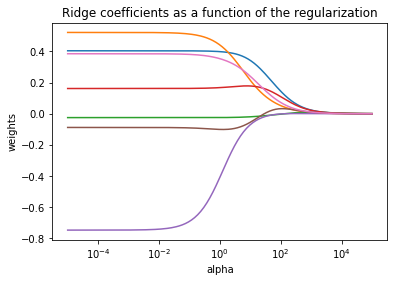

In [38]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

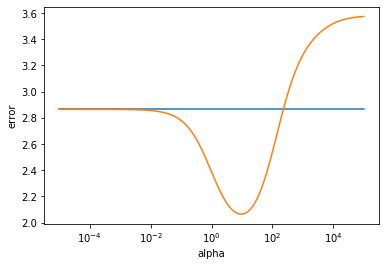

In [39]:
ax = plt.gca()

ax.plot(alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.axis('tight')
plt.show()


In [40]:
min(errors)

[2.8641499657014458, 2.0648270607950217]

The weights of the regression are diminished by the ridge. We can use Cross validation to automatically do this optimisaiton using : _sklearn.linear_model.RidgeCV_

## Applying Lasso to regression

In [42]:
from sklearn.linear_model import Lasso

n_alphas = 300
alphas = np.logspace(-5, 1, n_alphas)
lasso = linear_model.Lasso(fit_intercept=False)

coefs = []
errors = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
    errors.append([baseline_error, np.mean((lasso.predict(X_test) - y_test) ** 2)])

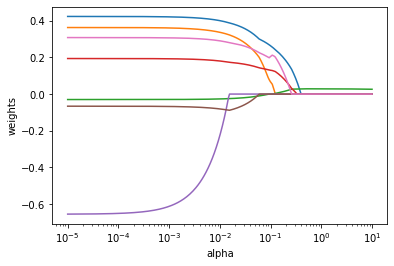

In [43]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.axis('tight')
plt.show()

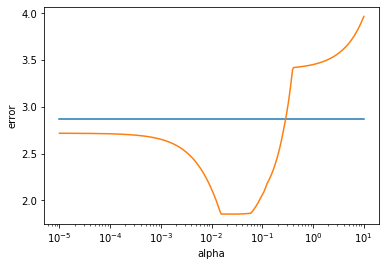

In [44]:
ax = plt.gca()

ax.plot(alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.axis('tight')
plt.show()


In [46]:
min(errors)

[2.8641499657014458, 1.8531561201728324]

Lasso cancels (sets weight to zero) variables that are are correlated. Can use cross validation to find best param  _sklearn.linear_model.LassoCV_